# IT256 LAB ASSIGNMENT 8

by: *Vivek vittal biragoni 211AI041*
24/05/23

K-means clustering is an unsupervised machine learning algorithm used to partition data into groups or clusters based on their similarity. Here are some key points about k-means clustering:

1. Objective: The goal of k-means clustering is to minimize the within-cluster sum of squares, which measures the distance between each data point and the centroid of its assigned cluster.

2. Number of Clusters: The algorithm requires specifying the number of clusters (k) in advance. It assumes that the data can be divided into k distinct groups.

3. Algorithm Steps:
   - Initialization: Randomly select k data points as initial cluster centroids.
   - Assignment: Assign each data point to the nearest centroid, forming k clusters.
   - Update: Calculate the new centroids as the mean of the data points within each cluster.
   - Repeat the assignment and update steps until convergence or a maximum number of iterations.

4. Euclidean Distance: K-means clustering typically uses the Euclidean distance metric to measure the similarity between data points.

5. Centroids: The centroids represent the center of each cluster and are updated iteratively during the algorithm's execution.

6. Convergence: The algorithm converges when the assignments of data points to clusters no longer change significantly or when the maximum number of iterations is reached.

7. Cluster Assignment: Each data point is assigned to the cluster with the nearest centroid based on the Euclidean distance.

8. Accuracy Evaluation: In the absence of ground truth labels, evaluating the accuracy of k-means clustering can be challenging. One common approach is to compare the cluster assignments with the known labels if available. However, this may not always be possible in unsupervised settings.

9. Visualization: Visualizing the results of k-means clustering can provide insights into the structure and grouping of the data. Plotting the data points colored by their assigned clusters and the cluster centroids helps understand the separation and compactness of the clusters.

10. Limitations:
    - Sensitivity to Initial Centroids: The algorithm's performance can be influenced by the initial choice of centroids, as it may converge to different local optima.
    - Determining the Number of Clusters: Selecting the appropriate number of clusters (k) can be subjective and may require domain knowledge or trial and error.
    - Sensitive to Outliers: Outliers can significantly impact the centroid calculations and cluster assignments.

Overall, k-means clustering is a widely used algorithm for unsupervised clustering tasks. It provides a simple and interpretable approach to group similar data points together based on their features.

In [15]:
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [16]:
# Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    squared_distance = 0
    for i in range(len(x1)):
        squared_distance += (x1[i] - x2[i]) ** 2
    return squared_distance ** 0.5

The euclidean_distance function calculates the Euclidean distance between two points in a multi-dimensional space. It takes two points, x1 and x2, as input and returns the Euclidean distance between them.

In [17]:
# Define the k-means clustering function
def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape

    # Initialize centroids randomly
    centroid_indices = random.sample(range(n_samples), k)
    centroids = [X[i] for i in centroid_indices]

    # Assign each sample to the closest centroid
    cluster_labels = [0] * n_samples
    for _ in range(max_iters):
        # Assign samples to the closest centroid
        for i in range(n_samples):
            distances = [euclidean_distance(X[i], centroids[j]) for j in range(k)]
            cluster_labels[i] = min(range(k), key=lambda x: distances[x])

        # Update centroids
        for j in range(k):
            cluster_samples = [X[i] for i in range(n_samples) if cluster_labels[i] == j]
            centroid = [sum(feature) / len(cluster_samples) for feature in zip(*cluster_samples)]
            centroids[j] = centroid

    return centroids, cluster_labels


The function uses the euclidean_distance function to calculate the distance between points.

The centroids are represented as a list of points.

The cluster labels are represented as a list where each element corresponds to the cluster label of a sample in the dataset.

The function iteratively assigns samples to clusters and updates the centroids to find the best clustering solution.

In [18]:
# Define a function to calculate the accuracy of the clustering model
def accuracy(y_true, y_pred):
    correct_count = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct_count += 1
    return correct_count / len(y_true)

The accuracy function calculates the accuracy of a clustering model by comparing the true labels y_true with the predicted labels y_pred.

In [19]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
n_classes = len(target_names)


In [20]:
# Perform k-means clustering
k = n_classes  # Set the number of clusters to be the same as the number of classes
centroids, cluster_labels = kmeans(X, k)


In [21]:
# Calculate accuracy of the clustering model
labels_mapping = {}
for i in range(k):
    cluster_samples = [y[j] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
    labels_mapping[i] = max(set(cluster_samples), key=cluster_samples.count)
predicted_labels = [labels_mapping[label] for label in cluster_labels]
acc = accuracy(y, predicted_labels)

Key points:

The code performs a mapping between cluster labels and true labels to evaluate the clustering model's accuracy.

It assumes that the true labels y and the cluster labels in cluster_labels are in the same order.

The accuracy is calculated by comparing the predicted labels with the true labels.





Text(0.5, 1.0, 'Original Data')

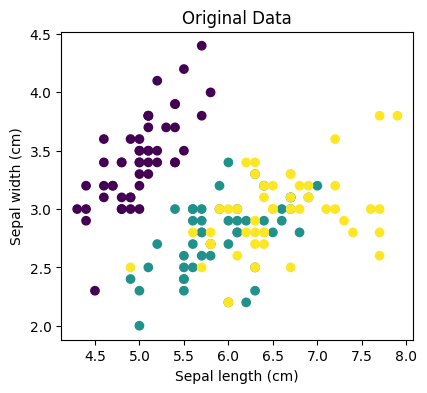

In [22]:
# Plot the original data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Original Data')

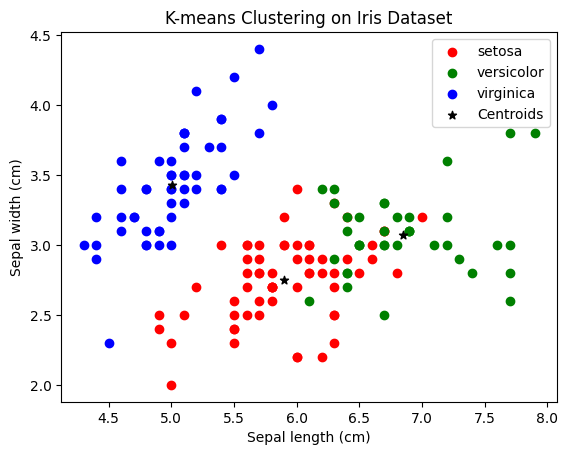

Accuracy: 89.33%


In [23]:
# Plot the clusters
colors = ['red', 'green', 'blue']
for i in range(k):
    cluster_x = [X[j][0] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
    cluster_y = [X[j][1] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
    plt.scatter(cluster_x, cluster_y, color=colors[i], label=target_names[i])
centroid_x = [centroid[0] for centroid in centroids]
centroid_y = [centroid[1] for centroid in centroids]
plt.scatter(centroid_x, centroid_y, color='black', marker='*', label='Centroids')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('K-means Clustering on Iris Dataset')
plt.legend()
plt.show()

print("Accuracy: {:.2f}%".format(acc * 100))